In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
df = pd.read_csv('marketing_AB.csv')

In [3]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Unnamed: 0     588101 non-null  int64
 1   user id        588101 non-null  int64
 2   test group     588101 non-null  str  
 3   converted      588101 non-null  bool 
 4   total ads      588101 non-null  int64
 5   most ads day   588101 non-null  str  
 6   most ads hour  588101 non-null  int64
dtypes: bool(1), int64(4), str(2)
memory usage: 27.5 MB


In [5]:
df.describe()

,Unnamed: 0,user id,total ads,most ads hour
count,588101.000000,5.881010e+05,588101.000000,588101.000000
mean,294050.000000,1.310692e+06,24.820876,14.469061
std,169770.279668,2.022260e+05,43.715181,4.834634
min,0.000000,9.000000e+05,1.000000,0.000000
25%,147025.000000,1.143190e+06,4.000000,11.000000
50%,294050.000000,1.313725e+06,13.000000,14.000000
75%,441075.000000,1.484088e+06,27.000000,18.000000
max,588100.000000,1.654483e+06,2065.000000,23.000000


In [6]:
df = df.drop(columns=["Unnamed: 0"])

In [7]:
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [8]:
df.shape

(588101, 6)

In [9]:
df.isnull().sum()

user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [10]:
# convert "converted" column to integer type
df["converted"].astype(int)

0         0
1         0
2         0
3         0
4         0
         ..
588096    0
588097    0
588098    0
588099    0
588100    0
Name: converted, Length: 588101, dtype: int64

In [11]:
# separate the data into two groups based on the "test group" column for comparison
ad_group = df[df["test group"] == "ad"]
psa_group = df[df["test group"] == "psa"]

In [12]:
ad_conversion = ad_group["converted"].mean()
psa_conversion = psa_group["converted"].mean()

ad_conversion, psa_conversion

(np.float64(0.025546559636683747), np.float64(0.01785410644448223))

In [13]:
summary = pd.DataFrame({
    "Group": ["Ad", "PSA"],
    "Users": [len(ad_group), len(psa_group)],
    "Conversions": [ad_group["converted"].sum(), psa_group["converted"].sum()],
    "Conversion Rate": [ad_conversion, psa_conversion]
})

summary

,Group,Users,Conversions,Conversion Rate
0,Ad,564577,14423,0.025547
1,PSA,23524,420,0.017854


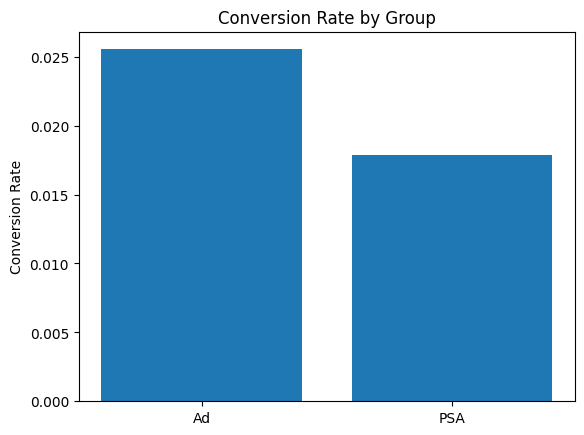

In [14]:
plt.bar(summary["Group"], summary["Conversion Rate"])
plt.title("Conversion Rate by Group")
plt.ylabel("Conversion Rate")
plt.show()

In [15]:
conversions = np.array([
    ad_group["converted"].sum(),
    psa_group["converted"].sum()
])

samples = np.array([
    len(ad_group),
    len(psa_group)
])

In [16]:
from statsmodels.stats.proportion import proportions_ztest

z_stat, p_value = proportions_ztest(conversions, samples)
z_stat, p_value

(np.float64(7.3700781265454145), np.float64(1.7052807161559727e-13))

In [19]:
p_value

np.float64(1.7052807161559727e-13)

In [17]:
alpha = 0.05

if p_value < alpha:
    print("Statistically significant difference. Ads are effective.")
else:
    print("No statistically significant difference. Ads are not effective.")

Statistically significant difference. Ads are effective.


In [18]:
from statsmodels.stats.proportion import confint_proportions_2indep

# Confidence interval for the difference in proportions
confint = confint_proportions_2indep(
    conversions[0], samples[0],  # ad group
    conversions[1], samples[1],  # psa group
    method='wald'
)

print(f"95% Confidence Interval for difference in proportions: ({confint[0]:.4f}, {confint[1]:.4f})")

95% Confidence Interval for difference in proportions: (0.0060, 0.0094)
